![hackio](https://github.com/Hack-io-Data/Imagenes/blob/main/01-LogosHackio/logo_celeste@4x.png?raw=true)


# Laboratorio A/B Testing No Paramétricos

**Aerolínea:** 
Alas del Mundo

**Descripción de la Aerolínea**

Alas del Mundo es una aerolínea internacional que opera una amplia red de rutas a nivel mundial. La compañía se enorgullece de ofrecer vuelos cómodos y asequibles a una variedad de destinos, atrayendo a una diversa gama de clientes.

**Objetivo del Análisis**

El objetivo de este ejercicio es determinar si existe una diferencia significativa en el número de vuelos reservados entre pasajeros con diferentes niveles educativos y si existe una diferencia significativa entre el género de sus clientes y su salario. La aerolínea desea entender mejor a sus clientes para poder personalizar sus campañas de marketing y mejorar sus estrategias de ventas.

**Set de datos**

El conjunto de datos *alas_del_mundo.csv* contiene información sobre clientes de la aerolínea Alas del Mundo. A continuación, tenemos una descripción de lo que nos podemos encontrar en el conjunto de datos:

- **Loyalty Number**: Número de registro de cada uno de los clientes.

- **Province**: Provincia de residencia del cliente.

- **City**: Ciudad de residencia del cliente.

- **Gender**: Género con el que se identifica el cliente.

- **Education**: Nivel educativo del cliente.

- **Salary**: Salario anual del cliente.

- **Loyalty Card**: Nivel que tiene el cliente dentro del programa de fidelización de la aerolínea.

- **CLV**: Valor total del cliente para la aerolínea a lo largo de toda su relación.

- **Enrollment Type**: Forma de registro del cliente a la aerolínea.

- **Enrollment Year**: Año de inscripción.

- **Enrollment Month**: Mes de inscripción. 

- **Year**: Año en el que se realizan los vuelos.

- **Month**: Mes en el que se realizan los vuelos.

- **Flights Booked**: Vuelos reservados por el cliente en un mes y año concretos.

- **Distance**: Distancia de vuelo del cliente en un mes y año concreto

- **Points Accumulated**: Puntos acumulados por el cliente en un mes y año concretos.

## Ejercicio 1:

Antes de realizar el experimento A/B y formular hipótesis, es fundamental comprender a fondo el conjunto de datos y sus características. Para lograr esto, debes llevar a cabo un análisis exploratorio detallado de los datos (EDA), con el fin de familiarizarte con ellos y entender la información disponible.



In [2]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import sys
from itertools import combinations

sys.path.append('../') #pongo los 2 puntos para que salga de la carpeta
import src.support as s

In [3]:
df = pd.read_csv('C:\\Users\\DELL\\Git\\LAB_AB_no_parametrico\\datos\\alas_del_mundo.csv')

In [4]:
df.head()

,Loyalty Number,Province,City,Gender,Education,Salary,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Year,Month,Flights Booked,Distance,Points Accumulated
0,480934,Ontario,Toronto,Female,Bachelor,83236.0,Star,3839.14,Standard,2016,2,2017,1,0,0,0.0
1,480934,Ontario,Toronto,Female,Bachelor,83236.0,Star,3839.14,Standard,2016,2,2017,2,3,2823,282.0
2,480934,Ontario,Toronto,Female,Bachelor,83236.0,Star,3839.14,Standard,2016,2,2017,3,0,0,0.0
3,480934,Ontario,Toronto,Female,Bachelor,83236.0,Star,3839.14,Standard,2016,2,2017,4,0,0,0.0
4,480934,Ontario,Toronto,Female,Bachelor,83236.0,Star,3839.14,Standard,2016,2,2018,10,6,3352,335.0


In [5]:
nuevas_columnas = {columna: columna.strip().lower().replace(' ', '_') for columna in df.columns}
df.rename(columns=nuevas_columnas, inplace=True)

In [6]:
df.head()

,loyalty_number,province,city,gender,education,salary,loyalty_card,clv,enrollment_type,enrollment_year,enrollment_month,year,month,flights_booked,distance,points_accumulated
0,480934,Ontario,Toronto,Female,Bachelor,83236.0,Star,3839.14,Standard,2016,2,2017,1,0,0,0.0
1,480934,Ontario,Toronto,Female,Bachelor,83236.0,Star,3839.14,Standard,2016,2,2017,2,3,2823,282.0
2,480934,Ontario,Toronto,Female,Bachelor,83236.0,Star,3839.14,Standard,2016,2,2017,3,0,0,0.0
3,480934,Ontario,Toronto,Female,Bachelor,83236.0,Star,3839.14,Standard,2016,2,2017,4,0,0,0.0
4,480934,Ontario,Toronto,Female,Bachelor,83236.0,Star,3839.14,Standard,2016,2,2018,10,6,3352,335.0


## Primera exploración
- Tenemos 405624 filas, distribuidas en 16 columnas.
- Tenemos 1864 duplicados, que me he cargado.
- Tenemos valores negativos en la columna de salarios, voy a convertirlos a valor absoluto para que sean unos datos que me sumen a la media.
- Tengo toda una columna de de grupo educativo que no se conoce su educación (College). Al no conocer estos datos, pasamos por alto su trabajo ya que no podemos sacar dicha información de otra parte.
- Contaba con valores negativos en mis salarios, por lo que decidí convertir a positivos
- Después de convertir los negativos a positivos, mi media salarial es de 79371 anualmente.
- Cabe destacar que mis datos se reparten entre 2017-2018
- La mayor parte de vuelos lo hacen las mujeres.
- La residencia de los clientes de la aerolínea, son mayormente residentes en Toronto, Ontario.

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
loyalty_number,405624.0,550037.873084,258935.286969,100018.00,326961.00,550834.00,772194.00,999986.00
salary,302952.0,79268.825953,34992.133508,-58486.00,59262.00,73479.00,88612.00,407228.00
clv,405624.0,7991.976226,6863.663857,1898.01,3985.32,5776.34,8936.82,83325.38
enrollment_year,405624.0,2015.252529,1.979427,2012.00,2014.00,2015.00,2017.00,2018.00
enrollment_month,405624.0,6.668008,3.399766,1.00,4.00,7.00,10.00,12.00
year,405624.0,2017.500000,0.500001,2017.00,2017.00,2017.50,2018.00,2018.00
month,405624.0,6.500000,3.452057,1.00,3.75,6.50,9.25,12.00
flights_booked,405624.0,4.115052,5.225518,0.00,0.00,1.00,8.00,21.00
distance,405624.0,1208.880059,1433.155320,0.00,0.00,488.00,2336.00,6293.00
points_accumulated,405624.0,123.692721,146.599831,0.00,0.00,50.00,239.00,676.50


In [8]:
df.describe().median().T

loyalty_number        477830.936542
salary                 76373.912976
clv                     7427.820041
enrollment_year         2015.126265
enrollment_month           6.834004
year                    2017.500000
month                      6.500000
flights_booked             4.670285
distance                1321.017689
points_accumulated       135.146276
dtype: float64

In [9]:
df.select_dtypes('O').describe()

,province,city,gender,education,loyalty_card,enrollment_type
count,405624,405624,405624,405624,405624,405624
unique,11,29,2,5,3,2
top,Ontario,Toronto,Female,Bachelor,Star,Standard
freq,130896,81096,203640,253752,184224,382200


In [10]:
df[df.duplicated()]

,loyalty_number,province,city,gender,education,salary,loyalty_card,clv,enrollment_type,enrollment_year,enrollment_month,year,month,flights_booked,distance,points_accumulated
121,193662,Yukon,Whitehorse,Male,Bachelor,51124.0,Star,3844.57,Standard,2012,5,2017,1,0,0,0.0
160,193662,Yukon,Whitehorse,Male,Bachelor,51124.0,Star,3844.57,Standard,2012,5,2018,8,0,0,0.0
165,193662,Yukon,Whitehorse,Male,Bachelor,51124.0,Star,3844.57,Standard,2012,5,2018,11,0,0,0.0
2977,746226,British Columbia,Whistler,Female,Bachelor,63501.0,Star,4089.04,Standard,2018,1,2017,1,0,0,0.0
2979,746226,British Columbia,Whistler,Female,Bachelor,63501.0,Star,4089.04,Standard,2018,1,2017,2,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
381799,373638,Ontario,Thunder Bay,Female,Bachelor,92501.0,Star,11073.11,Standard,2014,10,2018,4,0,0,0.0
381801,373638,Ontario,Thunder Bay,Female,Bachelor,92501.0,Star,11073.11,Standard,2014,10,2018,5,0,0,0.0
381803,373638,Ontario,Thunder Bay,Female,Bachelor,92501.0,Star,11073.11,Standard,2014,10,2018,6,0,0,0.0
381805,373638,Ontario,Thunder Bay,Female,Bachelor,92501.0,Star,11073.11,Standard,2014,10,2018,7,0,0,0.0


In [11]:
df = df.drop_duplicates()

In [12]:
df.shape

(403760, 16)

In [13]:
df['gender'].value_counts(normalize=True)

gender
Female    0.502172
Male      0.497828
Name: proportion, dtype: float64

In [14]:
df.isnull().sum()

loyalty_number             0
province                   0
city                       0
gender                     0
education                  0
salary                102260
loyalty_card               0
clv                        0
enrollment_type            0
enrollment_year            0
enrollment_month           0
year                       0
month                      0
flights_booked             0
distance                   0
points_accumulated         0
dtype: int64

## Ejercicio 2:
Determina si existe una diferencia significativa en el número de vuelos reservados entre los diferentes niveles educativos.

 Pasos a seguir:

   - Definición de la hipótesis.
   - Prueba de hipótesis
   - Análisis de resultados
   - Conclusiones
   


### H0: no existe una diferencia significativa en el número de vuelos reservados entre los diferentes niveles educativos
### H1: existe una diferencia significativa en el número de vuelos reservados entre los diferentes niveles educativos

#### Segunda exploración: vuelos y educación
- En cuanto a educación, tenemos 5 valores únicos.

- En cuanto a la cantidad de vuelos, el mínimo es 0 y el máximo es 21 vuelos. Su media es de 4.13 medias y su mediana es de 4.68. Por lo que su distribución es normal.

- El grupo de educación que tiene un mayor conteo de vuelos es el de Bachelor, dejando en último lugar al grupo de Máster. A la vez, el grupo educativo con mayor frecuencia es el de Bachelor.


In [15]:
df['education'].unique()

array(['Bachelor', 'College', 'Master', 'High School or Below', 'Doctor'],
      dtype=object)

In [16]:
df[df['salary'] < 0].head()

,loyalty_number,province,city,gender,education,salary,loyalty_card,clv,enrollment_type,enrollment_year,enrollment_month,year,month,flights_booked,distance,points_accumulated
26328,542976,Quebec,Montreal,Male,High School or Below,-49830.0,Star,24127.5,2018 Promotion,2018,3,2017,1,0,0,0.0
26329,542976,Quebec,Montreal,Male,High School or Below,-49830.0,Star,24127.5,2018 Promotion,2018,3,2017,2,0,0,0.0
26330,542976,Quebec,Montreal,Male,High School or Below,-49830.0,Star,24127.5,2018 Promotion,2018,3,2017,3,0,0,0.0
26331,542976,Quebec,Montreal,Male,High School or Below,-49830.0,Star,24127.5,2018 Promotion,2018,3,2017,4,0,0,0.0
26332,542976,Quebec,Montreal,Male,High School or Below,-49830.0,Star,24127.5,2018 Promotion,2018,3,2017,5,0,0,0.0


In [17]:
df['salary'] =  df['salary'].apply(lambda x: abs(x) if x < 0 else x) # tenemos aqui la forma de reconvertir los alarios negativos a positivos

In [18]:
df[df['salary'] < 0].head() # para buscar nulos, pero ya los cambié antes

,loyalty_number,province,city,gender,education,salary,loyalty_card,clv,enrollment_type,enrollment_year,enrollment_month,year,month,flights_booked,distance,points_accumulated


In [19]:
s.exploracion_dataframe(df, 'education') # esta es la función principal de conocer los datos

El número de datos es 403760 y el de columnas es 16

 ..................... 

Los duplicados que tenemos en el conjunto de datos son: 0

 ..................... 

Los nulos que tenemos en el conjunto de datos son:


,%_nulos
salary,25.326927



 ..................... 

Los tipos de las columnas son:


,tipo_dato
loyalty_number,int64
province,object
city,object
gender,object
education,object
salary,float64
loyalty_card,object
clv,float64
enrollment_type,object
enrollment_year,int64



 ..................... 

Los valores que tenemos para las columnas categóricas son: 
La columna province tiene las siguientes valore únicos:


,count
province,
Ontario,130258
British Columbia,106442
Quebec,79573
Alberta,23360
Manitoba,15900
New Brunswick,15352
Nova Scotia,12507
Saskatchewan,9861
Newfoundland,6244


La columna city tiene las siguientes valore únicos:


,count
city,
Toronto,80775
Vancouver,62314
Montreal,49687
Winnipeg,15900
Whistler,13994
Halifax,12507
Ottawa,12262
Edmonton,11768
Trenton,11710


La columna gender tiene las siguientes valore únicos:


,count
gender,
Female,202757
Male,201003


La columna education tiene las siguientes valore únicos:


,count
education,
Bachelor,252567
College,102260
High School or Below,18915
Doctor,17731
Master,12287


La columna loyalty_card tiene las siguientes valore únicos:


,count
loyalty_card,
Star,183745
Nova,136883
Aurora,83132


La columna enrollment_type tiene las siguientes valore únicos:


,count
enrollment_type,
Standard,380419
2018 Promotion,23341



 ..................... 

Los principales estadísticos de las columnas categóricas para el Bachelor son: 


,count,unique,top,freq
province,252567,11,Ontario,80817
city,252567,29,Toronto,50931
gender,252567,2,Female,127302
education,252567,1,Bachelor,252567
loyalty_card,252567,3,Star,108148
enrollment_type,252567,2,Standard,237369



 ..................... 

Los principales estadísticos de las columnas numéricas para el Bachelor son: 


,count,mean,std,min,25%,50%,75%,max
loyalty_number,252567.0,548114.325134,260447.229088,100018.00,323011.50,548037.00,772484.00,999986.00
salary,252567.0,72599.080913,16667.675569,9081.00,58711.00,71972.00,85866.00,105563.00
clv,252567.0,8211.231866,7058.364835,2255.31,4142.56,5866.42,9080.64,83325.38
enrollment_year,252567.0,2015.261016,1.989055,2012.00,2014.00,2015.00,2017.00,2018.00
enrollment_month,252567.0,6.647032,3.380208,1.00,4.00,7.00,10.00,12.00
year,252567.0,2017.500370,0.500001,2017.00,2017.00,2018.00,2018.00,2018.00
month,252567.0,6.501043,3.451966,1.00,4.00,7.00,10.00,12.00
flights_booked,252567.0,4.110288,5.221671,0.00,0.00,1.00,8.00,21.00
distance,252567.0,1208.446626,1433.289111,0.00,0.00,488.00,2334.00,6262.00
points_accumulated,252567.0,123.733841,146.719975,0.00,0.00,50.00,239.00,675.00



 ..................... 

Los principales estadísticos de las columnas categóricas para el College son: 


,count,unique,top,freq
province,102260,11,Ontario,33480
city,102260,29,Toronto,20224
gender,102260,2,Male,51898
education,102260,1,College,102260
loyalty_card,102260,3,Star,50863
enrollment_type,102260,2,Standard,96541



 ..................... 

Los principales estadísticos de las columnas numéricas para el College son: 


,count,mean,std,min,25%,50%,75%,max
loyalty_number,102260.0,549280.619010,255249.759603,100102.00,330053.00,547699.00,764980.00,999982.00
salary,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
clv,102260.0,7584.627706,6555.084078,1898.01,3747.06,5568.95,8500.12,74228.52
enrollment_year,102260.0,2015.266781,1.962211,2012.00,2014.00,2015.00,2017.00,2018.00
enrollment_month,102260.0,6.668072,3.436317,1.00,4.00,7.00,10.00,12.00
year,102260.0,2017.500196,0.500002,2017.00,2017.00,2018.00,2018.00,2018.00
month,102260.0,6.501242,3.452016,1.00,4.00,7.00,10.00,12.00
flights_booked,102260.0,4.169744,5.246040,0.00,0.00,1.00,8.00,21.00
distance,102260.0,1220.214121,1433.152854,0.00,0.00,560.00,2352.00,6293.00
points_accumulated,102260.0,124.729674,146.461948,0.00,0.00,57.00,240.88,655.50



 ..................... 

Los principales estadísticos de las columnas categóricas para el Master son: 


,count,unique,top,freq
province,12287,11,Ontario,4108
city,12287,29,Toronto,2476
gender,12287,2,Female,6432
education,12287,1,Master,12287
loyalty_card,12287,3,Star,6692
enrollment_type,12287,2,Standard,11831



 ..................... 

Los principales estadísticos de las columnas numéricas para el Master son: 


,count,mean,std,min,25%,50%,75%,max
loyalty_number,12287.0,549248.162448,264145.849788,100644.00,316746.50,549064.00,781463.00,998072.00
salary,12287.0,103734.523724,17518.492270,56414.00,88120.00,105487.00,118530.00,133080.00
clv,12287.0,7494.386544,5903.160539,2174.11,3600.93,5140.39,10083.49,30591.61
enrollment_year,12287.0,2015.238056,1.944088,2012.00,2014.00,2015.00,2017.00,2018.00
enrollment_month,12287.0,6.821681,3.388708,1.00,4.00,7.00,10.00,12.00
year,12287.0,2017.500692,0.500020,2017.00,2017.00,2018.00,2018.00,2018.00
month,12287.0,6.502157,3.452259,1.00,4.00,7.00,10.00,12.00
flights_booked,12287.0,4.200700,5.213956,0.00,0.00,1.00,8.00,21.00
distance,12287.0,1238.786278,1437.629302,0.00,0.00,642.00,2370.00,6180.00
points_accumulated,12287.0,126.508268,146.821485,0.00,0.00,67.00,242.00,625.50



 ..................... 

Los principales estadísticos de las columnas categóricas para el High School or Below son: 


,count,unique,top,freq
province,18915,11,Ontario,6233
city,18915,29,Toronto,3835
gender,18915,2,Female,9696
education,18915,1,High School or Below,18915
loyalty_card,18915,3,Star,9620
enrollment_type,18915,2,Standard,17715



 ..................... 

Los principales estadísticos de las columnas numéricas para el High School or Below son: 


,count,mean,std,min,25%,50%,75%,max
loyalty_number,18915.0,557841.598784,258899.087562,101148.00,331325.00,561092.0,782804.00,994541.0
salary,18915.0,61146.378165,12105.350590,21853.00,52054.00,61806.0,71344.00,93875.0
clv,18915.0,7731.270379,6658.365908,2272.34,3707.28,5274.2,8991.98,43290.5
enrollment_year,18915.0,2015.197145,1.982687,2012.00,2014.00,2015.0,2017.00,2018.0
enrollment_month,18915.0,6.613904,3.451742,1.00,4.00,7.0,10.00,12.0
year,18915.0,2017.500502,0.500013,2017.00,2017.00,2018.0,2018.00,2018.0
month,18915.0,6.503569,3.452150,1.00,4.00,7.0,10.00,12.0
flights_booked,18915.0,4.176209,5.239267,0.00,0.00,1.0,8.00,21.0
distance,18915.0,1231.611420,1436.820916,0.00,0.00,621.0,2370.00,6032.0
points_accumulated,18915.0,125.792231,146.589146,0.00,0.00,63.0,243.00,661.5



 ..................... 

Los principales estadísticos de las columnas categóricas para el Doctor son: 


,count,unique,top,freq
province,17731,11,Ontario,5620
city,17731,29,Toronto,3309
gender,17731,2,Female,8965
education,17731,1,Doctor,17731
loyalty_card,17731,3,Star,8422
enrollment_type,17731,2,Standard,16963



 ..................... 

Los principales estadísticos de las columnas numéricas para el Doctor son: 


,count,mean,std,min,25%,50%,75%,max
loyalty_number,17731.0,570327.226834,254389.869544,101594.00,355994.00,581380.00,788292.00,999911.00
salary,17731.0,178403.675202,70380.054033,48109.00,124407.00,180440.00,236612.00,407228.00
clv,17731.0,7815.738556,6467.049620,2119.89,4046.94,5623.31,8583.27,58207.13
enrollment_year,17731.0,2015.077266,1.952483,2012.00,2013.00,2015.00,2017.00,2018.00
enrollment_month,17731.0,6.907337,3.384204,1.00,4.00,7.00,10.00,12.00
year,17731.0,2017.500592,0.500014,2017.00,2017.00,2018.00,2018.00,2018.00
month,17731.0,6.503074,3.452037,1.00,4.00,7.00,10.00,12.00
flights_booked,17731.0,4.175512,5.256971,0.00,0.00,1.00,8.00,21.00
distance,17731.0,1231.799278,1445.236313,0.00,0.00,585.00,2380.00,6293.00
points_accumulated,17731.0,125.939187,147.699553,0.00,0.00,60.00,243.00,676.50


In [20]:
df_medias_std = df.groupby('education')['flights_booked'].agg(["mean", "std", 'median']).reset_index()

In [21]:
df.groupby('education')['flights_booked'].count()

education
Bachelor                252567
College                 102260
Doctor                   17731
High School or Below     18915
Master                   12287
Name: flights_booked, dtype: int64

In [22]:
df_medias_std

,education,mean,std,median
0,Bachelor,4.110288,5.221671,1.0
1,College,4.169744,5.246040,1.0
2,Doctor,4.175512,5.256971,1.0
3,High School or Below,4.176209,5.239267,1.0
4,Master,4.200700,5.213956,1.0


Al encontrar que mi pvalor para calcular la normalidad es 0, eso significa que no se puede aceptar que H0 es correcta. Lo que quiere decir que mis datos no son normales, por lo que son no paramétricos.

In [23]:
distA = np.random.normal(loc=df_medias_std['mean'][0], scale=df_medias_std['std'][0], size=252567)
distB = np.random.normal(loc=df_medias_std['mean'][1], scale=df_medias_std['std'][1], size=102260)
distC = np.random.normal(loc=df_medias_std['mean'][2], scale=df_medias_std['std'][2], size=17731)
distD = np.random.normal(loc=df_medias_std['mean'][3], scale=df_medias_std['std'][3], size=18917)
distE = np.random.normal(loc=df_medias_std['mean'][4], scale=df_medias_std['std'][4], size=12287)

In [24]:
stats.kstest(df[df['education'] == 'Bachelor']['flights_booked'], distA) #datos normales

KstestResult(statistic=0.272608852304537, pvalue=0.0, statistic_location=0.0, statistic_sign=1)

In [25]:
stats.kstest(df[df['education'] == 'College']['flights_booked'], distB) #datos normales

KstestResult(statistic=0.27036964600039115, pvalue=0.0, statistic_location=0.0, statistic_sign=1)

In [26]:
stats.kstest(df[df['education'] == 'High School or Below']['flights_booked'], distC) #datos normales

KstestResult(statistic=0.26743454062431193, pvalue=0.0, statistic_location=0.0, statistic_sign=1)

In [27]:
stats.kstest(df[df['education'] == 'Doctor']['flights_booked'], distD) #datos normales

KstestResult(statistic=0.26743638082835236, pvalue=0.0, statistic_location=0.0, statistic_sign=1)

In [28]:
stats.kstest(df[df['education'] == 'Master']['flights_booked'], distE) #datos normales

KstestResult(statistic=0.2675999023358021, pvalue=0.0, statistic_location=0.0, statistic_sign=1)

<Axes: xlabel='flights_booked', ylabel='Count'>

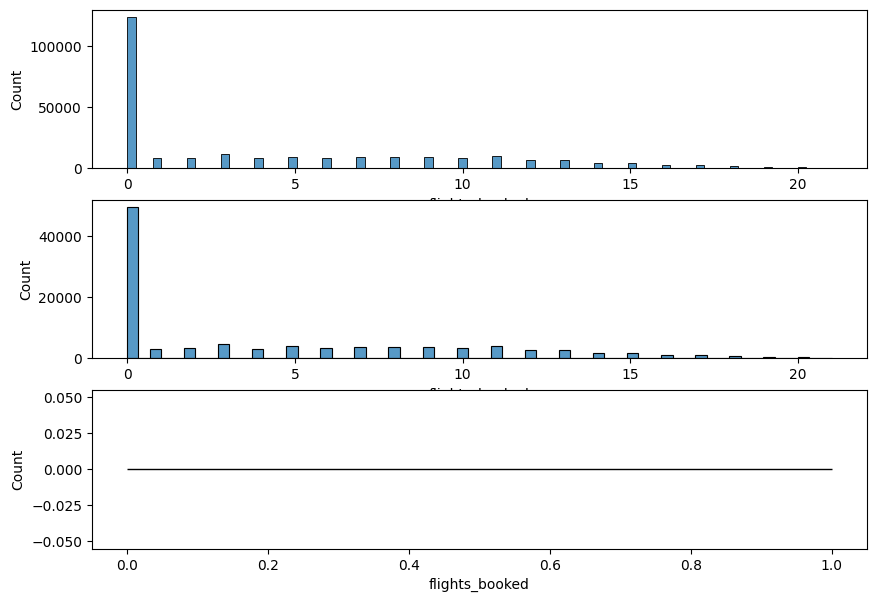

In [29]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize = (10,7))

axes = axes.flat # pasamos al 3x1

sns.histplot(x='flights_booked', data= df[df['education']=='Bachelor'], ax=axes[0])#vemos que tiene cola, por eso hacemos levene
sns.histplot(x='flights_booked', data= df[df['education']=='College'], ax=axes[1])#vemos que tiene cola, por eso hacemos levene
sns.histplot(x='flights_booked', data= df[df['education']=='High School or below'], ax=axes[2])#vemos que tiene cola, por eso hacemos levene

Traigo mis funciones para trabajar con mis datos no paramétricos

In [30]:
# def crear_df_grupos(dataframe, columna_grupo, columna_metrica):
#     lista_nombre_variables = []
#     for valor in dataframe[columna_grupo].unique():
#         globals()[valor.lower()] = dataframe[dataframe[columna_grupo] == valor] [columna_metrica]
#         lista_nombre_variables.append(valor.lower())
#     return lista_nombre_variables

# def elegir_test(num_grupos, dependencia, lista_nombres):

#     if num_grupos > 2 and dependencia ==0:
#         print(stats.kruskal(*[globals()[variable] for variable in lista_nombres]))
#     elif num_grupos == 2 and dependencia == 0:
#         print(stats.mannwhitneyu(*[globals()[variable] for variable in lista_nombres]))
#     elif num_grupos == 2 and dependencia == 1: 
#         print(stats.wilcoxon(*[globals()[variable] for variable in lista_nombres]))
#     else:
#         print('No es posible identificar un método')

In [31]:
nombres = s.crear_df_grupos(df,'education', 'flights_booked')
print(nombres)

['bachelor', 'college', 'master', 'high school or below', 'doctor']


In [32]:
s.elegir_test(5, 0, nombres)

KruskalResult(statistic=17.532618623121756, pvalue=0.0015225470219889365)


El estudio tiene influencia sobre la cantidad de vuelos de los grupos. Esto es la conclusion del pvalor menor a 0.05.

Con esta visualización, nuevamente compruebo que no son datos normales.

In [33]:
education_vuelos = df.groupby('education')['flights_booked'].count()

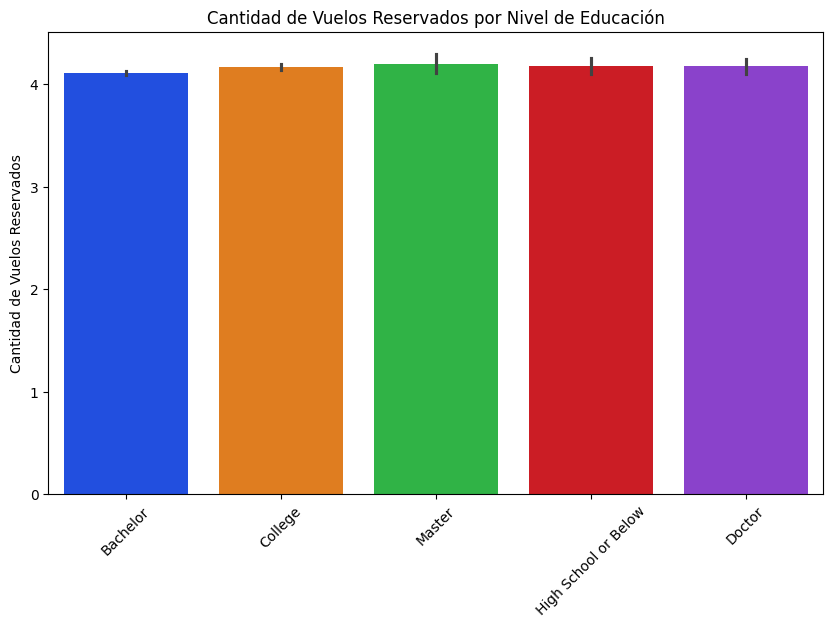

In [34]:
plt.figure(figsize=(10, 6))
sns.barplot(x='education',y='flights_booked', data=df, palette='bright')
plt.xlabel('')
plt.ylabel('Cantidad de Vuelos Reservados')
plt.title('Cantidad de Vuelos Reservados por Nivel de Educación')
plt.xticks(rotation=45)  # Rotar etiquetas del eje x si es necesario
plt.show()

In [35]:
listanueva = []

In [36]:
listanueva.append(nombres[0])
listanueva.append(nombres[-1])

In [37]:
lista_columnas = df['education'].unique().tolist()
lista_columnas
combinations(lista_columnas, 2) # nos devuelve un elemento de itertools, por eso lo pasamos a lista, combinaciones de 2

In [38]:
combinaciones = list(combinations(lista_columnas, 2)) # nos devuelve un elemento de itertools, por eso lo pasamos a lista

In [39]:
len(combinaciones)

10

In [40]:
lista_education=df["education"].unique()
combinaciones=list(combinations(lista_education,2))
for indice, valor in enumerate(combinaciones):
    statistics, p_valor= stats.mannwhitneyu(df[df["education"]== valor[0]]["flights_booked"],df[df["education"]== valor[1]]["flights_booked"])
    print(f"La evaluación de la hipótesis entre {valor[0]} y {valor[1]} da un p-value de {p_valor}")
    if p_valor >= 0.05:
        print("No hay diferencia")
        print("...")
    else:
        print("Hay diferencia")
        print('...')

La evaluación de la hipótesis entre Bachelor y College da un p-value de 0.002278100128804696
Hay diferencia
...
La evaluación de la hipótesis entre Bachelor y Master da un p-value de 0.014056962299193064
Hay diferencia
...
La evaluación de la hipótesis entre Bachelor y High School or Below da un p-value de 0.036000727159277525
Hay diferencia
...
La evaluación de la hipótesis entre Bachelor y Doctor da un p-value de 0.09460787010212152
No hay diferencia
...
La evaluación de la hipótesis entre College y Master da un p-value de 0.23837842894303352
No hay diferencia
...
La evaluación de la hipótesis entre College y High School or Below da un p-value de 0.575742751816062
No hay diferencia
...
La evaluación de la hipótesis entre College y Doctor da un p-value de 0.8395531886114369
No hay diferencia
...
La evaluación de la hipótesis entre Master y High School or Below da un p-value de 0.5556798765637352
No hay diferencia
...
La evaluación de la hipótesis entre Master y Doctor da un p-value de

Al encontrar que teníamos diferencias pero en la gráfica no era notable, tuve que realizar combinaciones entre mis clases (en este caso educación). Una vez hechas, he descubierto que no existe diferencia en casi ningún par de grupos sin embargo si hay diferencias en 3 pares de combinaciones.
- Bachelor y College
- Bachelor y Master
- Bacherlor y High School

## Ejercicio 3:
Determina si existe una diferencia significativa en el salario de los clientes en función del género de los mismos.

Pasos a seguir:
   - Definición de la hipótesis.
   - Prueba de hipótesis
   - Análisis de resultados
   - Conclusiones

H0: no existe una diferencia significativa en el salario de los clientes en función del género de los mismos
H1: existe una diferencia significativa en el salario de los clientes en función del género de los mismos

- Al grupo de College no se le puede considerar los datos de su salario, por lo que voy a proceder con un data frame nuevo sin este grupo eliminando un 20% de los datos.
- Al realizar esos cambios, nos queda un DF de un 50.55% mientras que los hombre estan en un 49.45% de los datos.
- La media de salario de mujeres es de 79331 y los hombres un 79412, sin embargo las medianas sí tienen una mayor distancia entre ella con 73638 en mujeres y 73287 con hombres.

In [41]:
df.head()

,loyalty_number,province,city,gender,education,salary,loyalty_card,clv,enrollment_type,enrollment_year,enrollment_month,year,month,flights_booked,distance,points_accumulated
0,480934,Ontario,Toronto,Female,Bachelor,83236.0,Star,3839.14,Standard,2016,2,2017,1,0,0,0.0
1,480934,Ontario,Toronto,Female,Bachelor,83236.0,Star,3839.14,Standard,2016,2,2017,2,3,2823,282.0
2,480934,Ontario,Toronto,Female,Bachelor,83236.0,Star,3839.14,Standard,2016,2,2017,3,0,0,0.0
3,480934,Ontario,Toronto,Female,Bachelor,83236.0,Star,3839.14,Standard,2016,2,2017,4,0,0,0.0
4,480934,Ontario,Toronto,Female,Bachelor,83236.0,Star,3839.14,Standard,2016,2,2018,10,6,3352,335.0


In [42]:
df[df['salary'].isna()]

,loyalty_number,province,city,gender,education,salary,loyalty_card,clv,enrollment_type,enrollment_year,enrollment_month,year,month,flights_booked,distance,points_accumulated
24,549612,Alberta,Edmonton,Male,College,NaN,Star,3839.61,Standard,2016,3,2017,1,9,1860,186.0
25,549612,Alberta,Edmonton,Male,College,NaN,Star,3839.61,Standard,2016,3,2017,2,9,2043,204.0
26,549612,Alberta,Edmonton,Male,College,NaN,Star,3839.61,Standard,2016,3,2017,3,14,2002,200.0
27,549612,Alberta,Edmonton,Male,College,NaN,Star,3839.61,Standard,2016,3,2017,4,0,0,0.0
28,549612,Alberta,Edmonton,Male,College,NaN,Star,3839.61,Standard,2016,3,2017,5,16,3056,305.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
405571,776187,British Columbia,Vancouver,Male,College,NaN,Star,74228.52,Standard,2014,3,2018,7,4,3640,364.0
405572,776187,British Columbia,Vancouver,Male,College,NaN,Star,74228.52,Standard,2014,3,2018,8,6,1890,189.0
405573,776187,British Columbia,Vancouver,Male,College,NaN,Star,74228.52,Standard,2014,3,2018,9,0,0,0.0
405574,776187,British Columbia,Vancouver,Male,College,NaN,Star,74228.52,Standard,2014,3,2018,11,11,2552,255.0


In [43]:
df.groupby('gender')['salary'].mean()

gender
Female    79331.860953
Male      79412.484625
Name: salary, dtype: float64

In [44]:
df.groupby('education')['salary'].mean()

education
Bachelor                 72599.080913
College                           NaN
Doctor                  178403.675202
High School or Below     61146.378165
Master                  103734.523724
Name: salary, dtype: float64

In [45]:
df_out_college = df[df['education'] != 'College']

In [46]:
df_out_college['gender'].value_counts(normalize=True)

gender
Female    0.505456
Male      0.494544
Name: proportion, dtype: float64

In [47]:
df_out_c_medias_std = df_out_college.groupby('gender')['salary'].agg(['mean', 'std', 'median']).reset_index()

In [48]:
df_out_college.groupby('gender')['salary'].count()

gender
Female    152395
Male      149105
Name: salary, dtype: int64

In [49]:
df_out_c_medias_std

,gender,mean,std,median
0,Female,79331.860953,34164.707711,73638.0
1,Male,79412.484625,35291.385010,73287.0


In [50]:
dist_coll_A = np.random.normal(loc=df_out_c_medias_std['mean'][0], scale=df_out_c_medias_std['std'][0], size=152395)
dist_coll_B = np.random.normal(loc=df_out_c_medias_std['mean'][1], scale=df_out_c_medias_std['std'][1], size=149105)

In [51]:
print(stats.kstest(df_out_college[df_out_college['gender'] == 'Female']['salary'], dist_coll_A)) #datos normales)
print(stats.kstest(df_out_college[df_out_college['gender'] == 'Male']['salary'], dist_coll_B)) #datos normales

KstestResult(statistic=0.15520850421601762, pvalue=0.0, statistic_location=105068.0, statistic_sign=1)
KstestResult(statistic=0.16506488716005496, pvalue=0.0, statistic_location=103495.0, statistic_sign=1)


El relación al resultado anterior nos damos cuenta que al ser 0.0 los datos no son normales por lo que pasamos directamente a un análisis no paramétrico.

## Análisis no paramétrico

<Axes: xlabel='salary', ylabel='Count'>

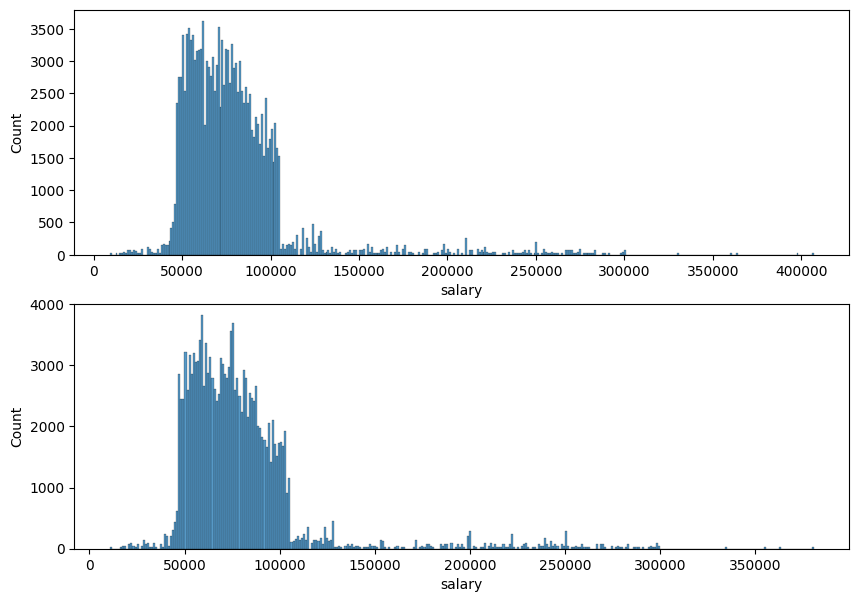

In [52]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize = (10,7))

axes = axes.flat # pasamos al 3x1

sns.histplot(x='salary', data= df_out_college[df_out_college['gender']=='Female'], ax=axes[0])#vemos que tiene cola, por eso hacemos levene
sns.histplot(x='salary', data= df_out_college[df_out_college['gender']=='Male'], ax=axes[1])#vemos que tiene cola, por eso hacemos levene

Volvemos a comprobar que no hay homogeneidad entre los datos.

In [53]:
genero = s.crear_df_grupos(df_out_college, 'gender', 'salary')

In [54]:
s.elegir_test(2, 0, genero)

MannwhitneyuResult(statistic=11463807930.0, pvalue=1.8291925056993112e-05)


La conclusión es que se rechaza la hipótesis nula, es decir, por lo que existe diferencia significativa en el salario de los clientes en función del genero de las personas. Esto aunque la visualizaón nos diga lo contrario.

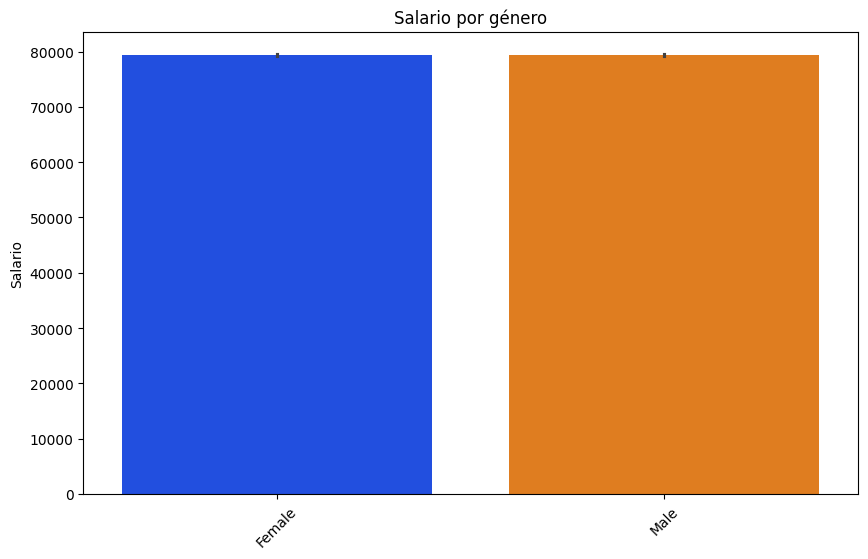

In [55]:
plt.figure(figsize=(10, 6))
sns.barplot(x='gender',y='salary', data=df_out_college, palette='bright')
plt.xlabel('')
plt.ylabel('Salario')
plt.title('Salario por género')
plt.xticks(rotation=45)  # Rotar etiquetas del eje x si es necesario
plt.show()

A mejorar, el df era un data frame completo que estaba dividido por sexo en 50% para cada uno y tenía datos de vuelos para repartidos en cada categoria. Lo que nos diría que es una prueba Wilcoxon pero al eliminar nulos, y una categoria completa de datos en relación a su educacion no pude hacer dicha prueba ya que requiere que los grupos sean iguales.

In [85]:
membresias= df["loyalty_card"].unique()
df_relleno= df.groupby("loyalty_card")["salary"].median()
dict={}
for indice,valor in zip(membresias,df_relleno):
    dict[indice]=valor

In [ ]:
df["salary"] = df["salary"].fillna(df["loyalty_card"].map(dict))

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 403760 entries, 0 to 405623
Data columns (total 16 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   loyalty_number      403760 non-null  int64  
 1   province            403760 non-null  object 
 2   city                403760 non-null  object 
 3   gender              403760 non-null  object 
 4   education           403760 non-null  object 
 5   salary              403760 non-null  float64
 6   loyalty_card        403760 non-null  object 
 7   clv                 403760 non-null  float64
 8   enrollment_type     403760 non-null  object 
 9   enrollment_year     403760 non-null  int64  
 10  enrollment_month    403760 non-null  int64  
 11  year                403760 non-null  int64  
 12  month               403760 non-null  int64  
 13  flights_booked      403760 non-null  int64  
 14  distance            403760 non-null  int64  
 15  points_accumulated  403760 non-null  fl

In [90]:
salarios_men = df[df["gender"] == "Male"]["salary"]
salarios_fem = df[df["gender"] == "Female"]["salary"]

min_length = min(len(salarios_men), len(salarios_fem))
salarios_men = salarios_men.sample(n=min_length, random_state=1)
salarios_fem = salarios_fem.sample(n=min_length, random_state=1)

statistic,p_value_s = stats.wilcoxon(salarios_men, salarios_fem)
if p_value_s >= 0.05:
    print(p_value_s)
    print("No hay diferencia")
else:
    print(p_value_s)
    print("Hay diferencia")

4.259322757362292e-05
Hay diferencia


Tomando en consideración lo que había ocurrido, tuve que llenar los salarios en este caso. Y partiendo del df original, ya sin duplicados, pude completar los salarios de los géneros en base a la mediana. Una vez hecho eso, tomé los dos grupos nuevamente (ya en grupos iguales).

Esto, de igual forma, nos arroja que hay diferencia entre grupos (p-valor menor a 0.05) por lo que no podemos aceptar la H0.